# Data Exploration
Import -> Clean -> Split into Training & Test
Dummy Variables (One hot encoding)
Feature Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../datasets/train.csv')
print(train_df.shape)
train_df.head(15)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# First view features Pclass and Fare show as good predictors of Survived with -0.34 and 0.26 correlation factors. 
# We wil see how that relationship looks in our visual exploration.
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
# Looks like Age and Cabin features will need some imputation as they are missing data points.
# Dataset Shape
print('Dataset Shape: ',train_df.shape)
# Null Values per feature
train_df.isnull().sum()

Dataset Shape:  (891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Samples for each Class
counter = train_df.Survived.value_counts()
dead_pct = counter[0] / (counter[0] + counter[1])
surv_pct = counter[1] / (counter[0] + counter[1])
print(f'Dead: {counter[0]} {dead_pct}')
print(f'Survived: {counter[1]} {surv_pct} ')

# Survived Class only count by 38% / possible resampling application for that class

Dead: 549 0.6161616161616161
Survived: 342 0.3838383838383838 


In [7]:
# Data Types Definitions
train_df.Survived = train_df.Survived.astype('str')
train_df.Pclass = train_df.Pclass.astype('int')

# Fill Age NAN values with 0 to facilitate the chart
train_df.Age = train_df.Age.fillna(0)
train_df.Age = train_df.Age.astype('int')

### DATA EXPLORATION

[[<AxesSubplot:xlabel='Sex', ylabel='count'>]]


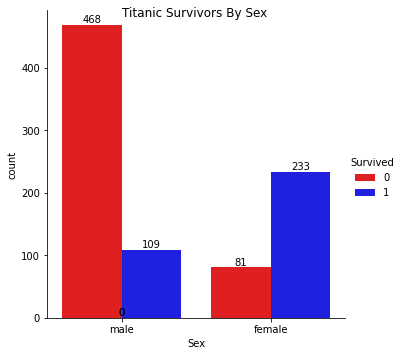

In [8]:
# From the chart we can conclude that Female were more probably to Survive
custom_palette = {"0": "red", "1": "blue"}
survivorsSex = sns.catplot(x = 'Sex', hue='Survived', kind='count', data= train_df, palette=custom_palette, legend="full")
survivorsSex.fig.suptitle('Titanic Survivors By Sex')

print(survivorsSex.axes)
# Iterate over the bars and add data labels
for ax in survivorsSex.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,  # X position
            height,  # Y position
            f'{height:.0f}',  # Label text
            ha='center',  # Horizontal alignment
            va='bottom'  # Vertical alignment
        )

# Show the plot
plt.show()



In [9]:
train_df.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 0.98, 'Titanic Survivors By Class')

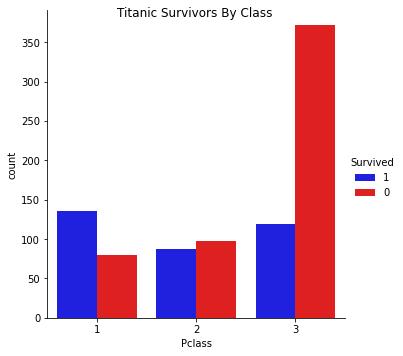

In [10]:
# Survivors by Class
# Define a custom palette
survivorsSex = sns.catplot(x = 'Pclass', hue='Survived', kind='count', data= train_df, palette=custom_palette)
survivorsSex.fig.suptitle('Titanic Survivors By Class')

Text(0.5, 0.98, 'Titanic Survivors By Port')

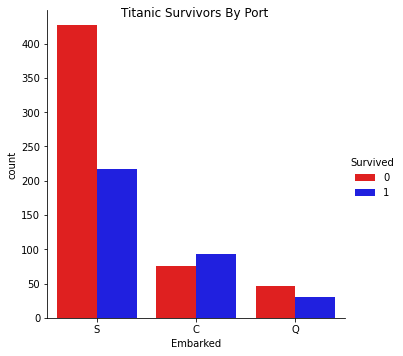

In [11]:
# Survivors by Port
survivorsPort = sns.catplot(x = 'Embarked', hue='Survived', kind='count', data= train_df, palette=custom_palette)
survivorsPort.fig.suptitle('Titanic Survivors By Port')

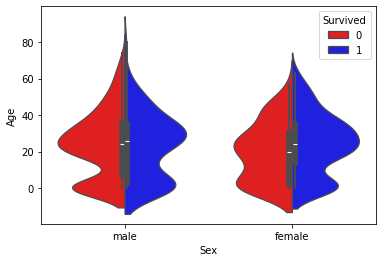

In [12]:
# Survivors by Age Distribution
fig1 = sns.violinplot(x='Sex', y = 'Age', hue='Survived', data= train_df, split=True, palette=custom_palette)
# fig1.suptitle('Titanic Survivors By Age')

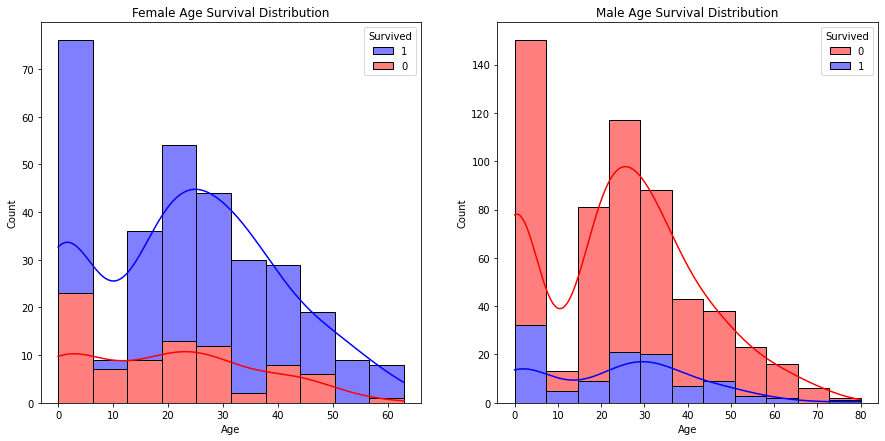

In [13]:

df_female = train_df[train_df['Sex']=='female']
df_male = train_df[train_df['Sex']=='male']

plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', hue='Survived', data=df_female, stat='count', multiple='stack', kde=True, palette=custom_palette  )
plt.title('Female Age Survival Distribution')

plt.subplot(1, 2, 2)
sns.histplot(x='Age', hue='Survived', data=df_male, stat='count', multiple='stack', kde=True, palette=custom_palette  )
plt.title('Male Age Survival Distribution')

plt.show()


Text(0.5, 0.98, 'Titanic Survivors By Age')

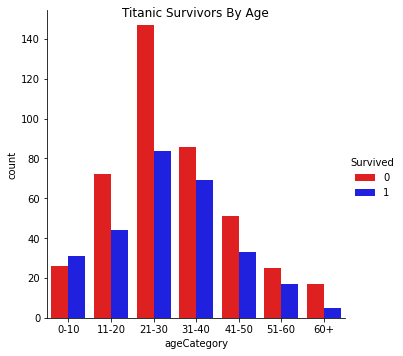

In [14]:
train_df['ageCategory'] = pd.cut(train_df['Age'], bins=[0,10,20,30,40,50,60,90], labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+'])

# Survivors by Age
survivorsPort = sns.catplot(x = 'ageCategory', hue='Survived', kind='count', data= train_df, palette=custom_palette)
survivorsPort.fig.suptitle('Titanic Survivors By Age')

# td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

In [15]:
# Family Size and Alone Features added
train_df['Family_Size'] = 0
train_df['Family_Size'] = (train_df['SibSp'] + train_df['Parch']).astype(str)
train_df['Survived'] = train_df['Survived'].astype(int)



train_df['Alone'] = 0 
train_df.loc[train_df['Family_Size'] == '0', 'Alone'] = 1
train_df['Alone'] = train_df['Alone'].astype(str)

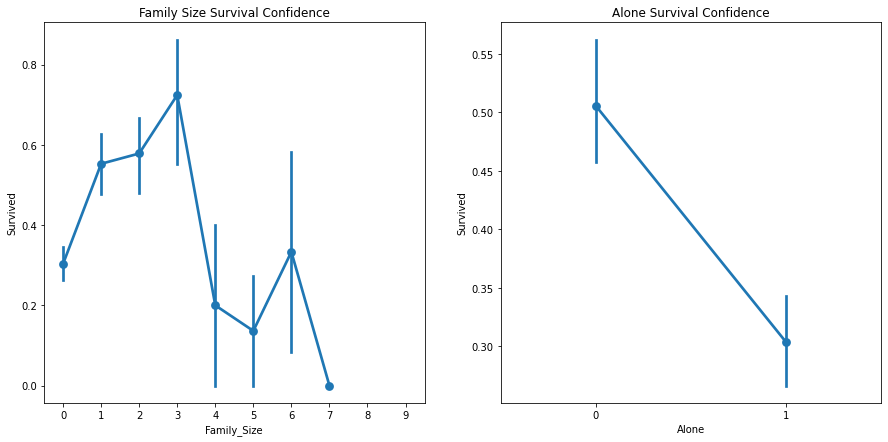

In [16]:


plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
# Pointplot for Family_Size 
o1 = ['0','1','2','3','4','5','6','7','8','9']
sns.pointplot(x = 'Family_Size', y='Survived', data= train_df, order=o1) #, palette=custom_palette)
plt.title('Family Size Survival Confidence')


# Factorplot for Alone 
plt.subplot(1, 2, 2)
sns.pointplot(x = 'Alone', y='Survived', data= train_df) 
plt.title('Alone Survival Confidence')

plt.show()



Text(0.5, 0.98, 'Titanic Survivors By Fare')

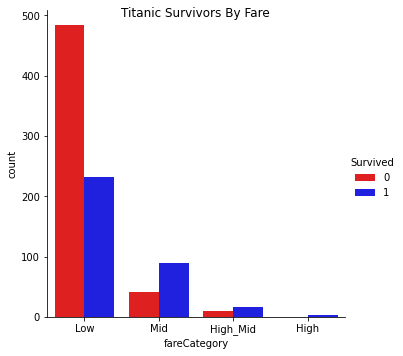

In [17]:
train_df['Survived'] = train_df['Survived'].astype(str)
train_df['fareCategory'] = pd.cut(train_df['Fare'], bins=[0,50,150,300,1000], labels=['Low','Mid','High_Mid','High'])


survivorsPort = sns.catplot(x = 'fareCategory', hue='Survived', kind='count', data= train_df, palette=custom_palette)
survivorsPort.fig.suptitle('Titanic Survivors By Fare')


<function matplotlib.pyplot.show(close=None, block=None)>

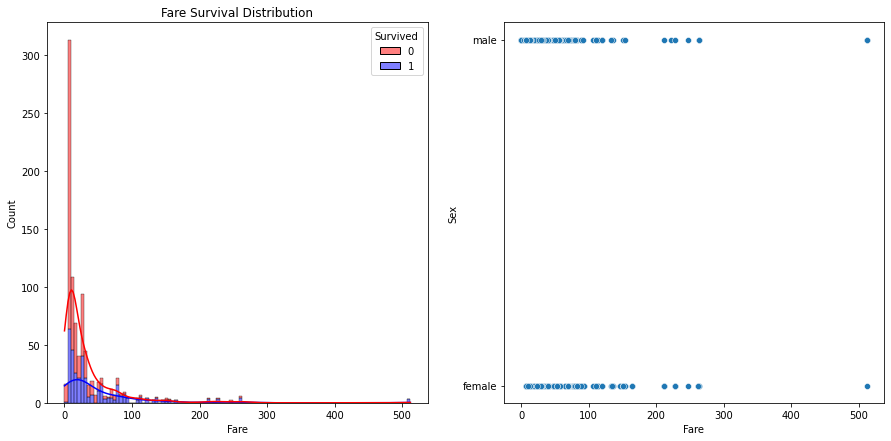

In [18]:

plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)

sns.histplot(x='Fare', hue='Survived', data=train_df, stat='count', multiple='stack', kde=True, palette=custom_palette  )
plt.title('Fare Survival Distribution')

plt.subplot(1,2,2)
sns.scatterplot(data=train_df, x="Fare", y="Sex")

plt.show


In [19]:
train_df.loc[ train_df['Fare'] < 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageCategory,Family_Size,Alone,fareCategory
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0000,NaN,S,31-40,0,1,NaN
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0000,B94,S,31-40,0,1,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0000,NaN,S,21-30,0,1,NaN
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0,0,0,239853,0.0000,NaN,S,NaN,0,1,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0000,NaN,S,11-20,0,1,NaN
378,379,0,3,"Betros, Mr. Tannous",male,20,0,0,2648,4.0125,NaN,C,11-20,0,1,Low
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,0,0,0,239853,0.0000,NaN,S,NaN,0,1,NaN
466,467,0,2,"Campbell, Mr. William",male,0,0,0,239853,0.0000,NaN,S,NaN,0,1,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,0,0,0,239854,0.0000,NaN,S,NaN,0,1,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0000,NaN,S,41-50,0,1,NaN


In [20]:
train_df.loc[ train_df['Fare']== 0,  ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageCategory,Family_Size,Alone,fareCategory
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0.0,NaN,S,31-40,0,1,NaN
263,264,0,1,"Harrison, Mr. William",male,40,0,0,112059,0.0,B94,S,31-40,0,1,NaN
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0.0,NaN,S,21-30,0,1,NaN
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,0,0,0,239853,0.0,NaN,S,NaN,0,1,NaN
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0.0,NaN,S,11-20,0,1,NaN
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,0,0,0,239853,0.0,NaN,S,NaN,0,1,NaN
466,467,0,2,"Campbell, Mr. William",male,0,0,0,239853,0.0,NaN,S,NaN,0,1,NaN
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,0,0,0,239854,0.0,NaN,S,NaN,0,1,NaN
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0.0,NaN,S,41-50,0,1,NaN
633,634,0,1,"Parr, Mr. William Henry Marsh",male,0,0,0,112052,0.0,NaN,S,NaN,0,1,NaN


In [21]:
print( "Records Missing Age:", train_df[train_df['Age'] == 0].count()['Age'] )
train_df.isnull().sum()

Records Missing Age: 184


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
ageCategory     184
Family_Size       0
Alone             0
fareCategory     15
dtype: int64

In [22]:
test_df = pd.read_csv('../datasets/test.csv')
print(test_df.shape)
test_df.head(15)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [23]:
# Missing data for Age, Cabin and Fare
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [24]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64